In [2]:
vars_to_download = {
 
    "B08124_036E": "biking_total_occ",
    "B08124_037E": "biking_mgmt_occ",
    "B08124_038E": "biking_service_occ",
    "B08124_039E": "biking_sales_occ",
    "B08124_040E": "biking_const_occ",
    "B08124_041E": "biking_trans_occ",
    "B08124_041E": "biking_military_occ",
    
    "B08006_031E": "biking_male",
    "B08006_048E": "biking_female",
    "B08006_014E": "biking_total",
    #biking_male + biking_female = biking_total
    
    "B19083_001E": "income_gini",         # Gini index of income inequality
    "B08301_001E": "trans_types_total"

}
vars_to_download_l = list(vars_to_download.keys())

In [3]:
%%time
db = acs.from_place("Portland, OR",
                  level="tract",
                  variables=vars_to_download_l)

/usr/local/lib/python3.9/site-packages/cenpy/geoparser.py:226: UserWarning: Shape is invalid: 
Ring Self-intersection[-13661556.7128 5700471.558]
  tell_user("Shape is invalid: \n{}".format(vexplain))
/usr/local/lib/python3.9/site-packages/cenpy/geoparser.py:245: ShapelyDeprecationWarning: The 'cascaded_union()' function is deprecated. Use 'unary_union()' instead.
  polygons[i] = exterior.difference(cascaded_union(owned_interiors))
/usr/local/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1638: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/usr/local/lib/python3.9/site-packages/geopandas/_vectorized.py:143: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts 

Matched: Portland, OR to Portland city within layer Incorporated Places
CPU times: user 735 ms, sys: 53.2 ms, total: 788 ms
Wall time: 9.14 s


In [4]:
var_names = acs.variables\
               .reindex(vars_to_download)\
               [["label", "concept"]]\
               .reset_index()\
               .rename(columns={"index": "var_id"})
var_names["short_name"] = var_names["var_id"].map(vars_to_download)

In [5]:
var_names

,var_id,label,concept,short_name
0,B08124_036E,"Estimate!!Total!!Taxicab, motorcycle, bicycle,...",MEANS OF TRANSPORTATION TO WORK BY OCCUPATION,biking_total_occ
1,B08124_037E,"Estimate!!Total!!Taxicab, motorcycle, bicycle,...",MEANS OF TRANSPORTATION TO WORK BY OCCUPATION,biking_mgmt_occ
2,B08124_038E,"Estimate!!Total!!Taxicab, motorcycle, bicycle,...",MEANS OF TRANSPORTATION TO WORK BY OCCUPATION,biking_service_occ
3,B08124_039E,"Estimate!!Total!!Taxicab, motorcycle, bicycle,...",MEANS OF TRANSPORTATION TO WORK BY OCCUPATION,biking_sales_occ
4,B08124_040E,"Estimate!!Total!!Taxicab, motorcycle, bicycle,...",MEANS OF TRANSPORTATION TO WORK BY OCCUPATION,biking_const_occ
5,B08124_041E,"Estimate!!Total!!Taxicab, motorcycle, bicycle,...",MEANS OF TRANSPORTATION TO WORK BY OCCUPATION,biking_military_occ
6,B08006_031E,Estimate!!Total!!Male!!Bicycle,SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK,biking_male
7,B08006_048E,Estimate!!Total!!Female!!Bicycle,SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK,biking_female
8,B08006_014E,Estimate!!Total!!Bicycle,SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK,biking_total
9,B19083_001E,Estimate!!Gini Index,GINI INDEX OF INCOME INEQUALITY,income_gini


In [6]:
filler = lambda col: col.fillna(0) #you could also put "0" here if you don't want to assume a mean exists
db.loc[:, vars_to_download] = db.loc[:, vars_to_download]\
                                .apply(filler)
db = db.rename(columns=vars_to_download)

In [8]:
db["area_sqkm"] = db.to_crs(epsg=6854).area / 1e6

In [10]:
db["pct_biking_male"] = db["biking_male"] / \
                  (db["biking_total"] + \
                   (db["biking_total"]==0) * 1
                  )
db["pct_biking_female"] = db["biking_female"] / \
                  (db["biking_total"] + \
                   (db["biking_total"]==0) * 1
                  )

In [11]:
db["pct_biking_mgmt_occ"] = db["biking_mgmt_occ"] / \
                  (db["biking_total_occ"] + \
                   (db["biking_total_occ"]==0) * 1
                  )
db["pct_biking_service_occ"] = db["biking_service_occ"] / \
                  (db["biking_total_occ"] + \
                   (db["biking_total_occ"]==0) * 1
                  )
db["pct_biking_sales_occ"] = db["biking_sales_occ"] / \
                  (db["biking_total_occ"] + \
                   (db["biking_total_occ"]==0) * 1
                  )
db["pct_biking_const_occ"] = db["biking_const_occ"] / \
                  (db["biking_total_occ"] + \
                   (db["biking_total_occ"]==0) * 1
                  )
db["pct_biking_militlary_occ"] = db["biking_military_occ"] / \
                  (db["biking_total_occ"] + \
                   (db["biking_total_occ"]==0) * 1
                  )


In [12]:
db.describe()

,biking_total,biking_male,biking_female,biking_total_occ,biking_mgmt_occ,biking_service_occ,biking_sales_occ,biking_const_occ,biking_military_occ,trans_types_total,income_gini,area_sqkm,pct_biking_male,pct_biking_female,pct_biking_mgmt_occ,pct_biking_service_occ,pct_biking_sales_occ,pct_biking_const_occ,pct_biking_militlary_occ
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,177.723214,111.687500,66.035714,209.598214,115.928571,33.937500,35.133929,6.553571,17.883929,2398.705357,0.438400,1.639435,0.632594,0.340620,0.524426,0.164176,0.174310,0.040445,0.087003
std,145.700001,95.551414,63.207641,158.233233,96.572497,37.722859,40.198045,13.783944,22.887010,884.264561,0.071317,0.982136,0.245875,0.229267,0.222263,0.162376,0.127595,0.108732,0.113978
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297096,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,71.500000,38.750000,18.000000,90.250000,43.750000,10.000000,11.000000,0.000000,0.000000,1789.000000,0.403925,1.094422,0.500000,0.206050,0.417598,0.052846,0.081270,0.000000,0.000000
50%,144.000000,93.000000,50.500000,178.500000,88.500000,22.000000,26.000000,0.000000,9.500000,2310.000000,0.435650,1.430610,0.636542,0.355385,0.545492,0.133072,0.156688,0.000000,0.050254
75%,252.250000,159.750000,97.500000,282.500000,165.750000,46.000000,46.500000,8.000000,26.750000,2912.250000,0.466775,1.900473,0.783538,0.478516,0.684519,0.248231,0.249788,0.026634,0.123220
max,601.000000,535.000000,304.000000,740.000000,439.000000,186.000000,324.000000,75.000000,107.000000,4816.000000,0.657600,7.798795,1.000000,1.000000,1.000000,1.000000,0.596491,0.777778,0.582090


In [13]:
cluster_variables = [
    "pct_biking_male",
    "pct_biking_female",
    "pct_biking_mgmt_occ",
    "pct_biking_service_occ",
    "pct_biking_sales_occ",
    "pct_biking_const_occ",
    "pct_biking_militlary_occ",
    "income_gini",
]

In [2]:
db.head()

NameError: name 'db' is not defined

/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +
/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarra

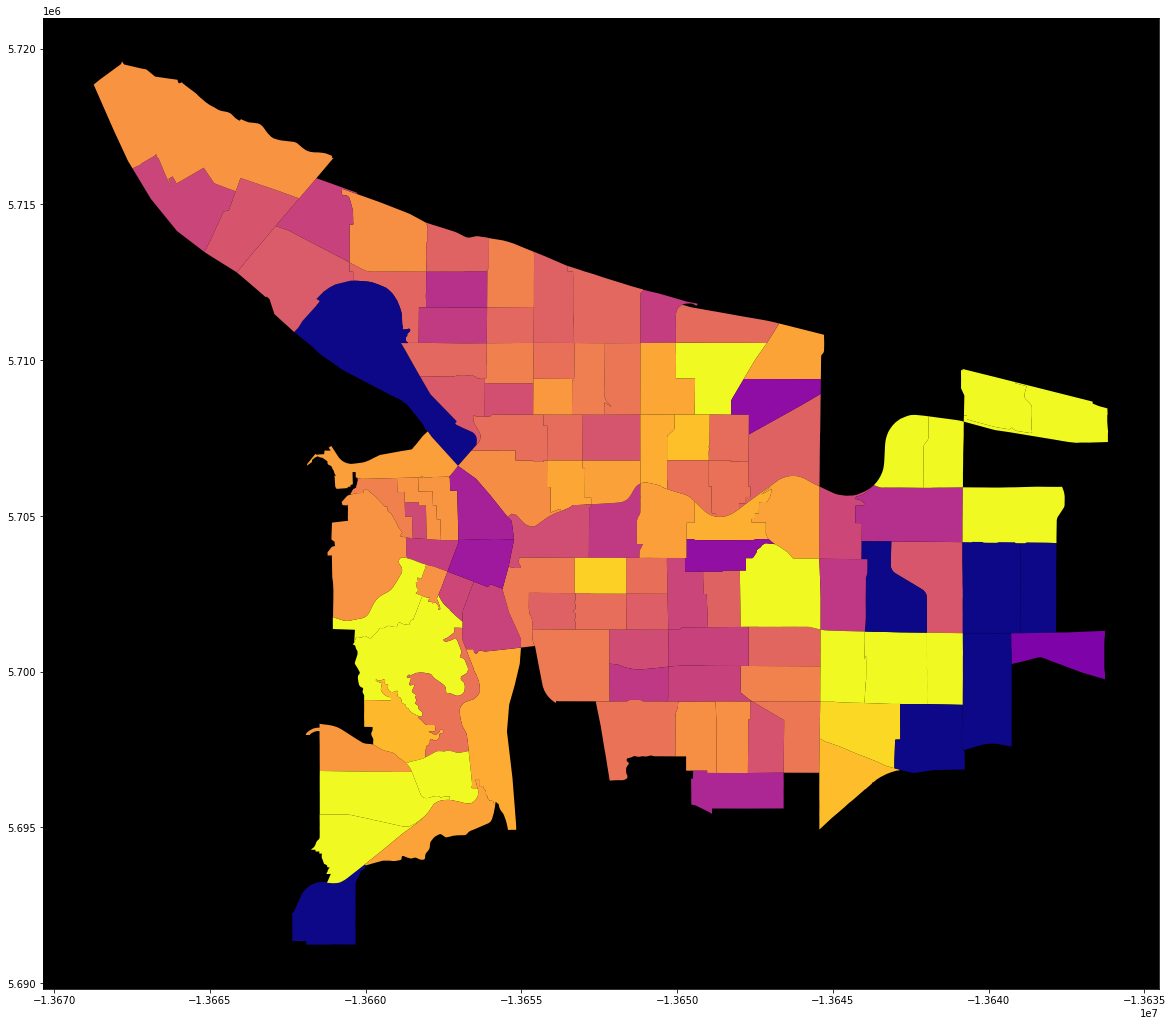

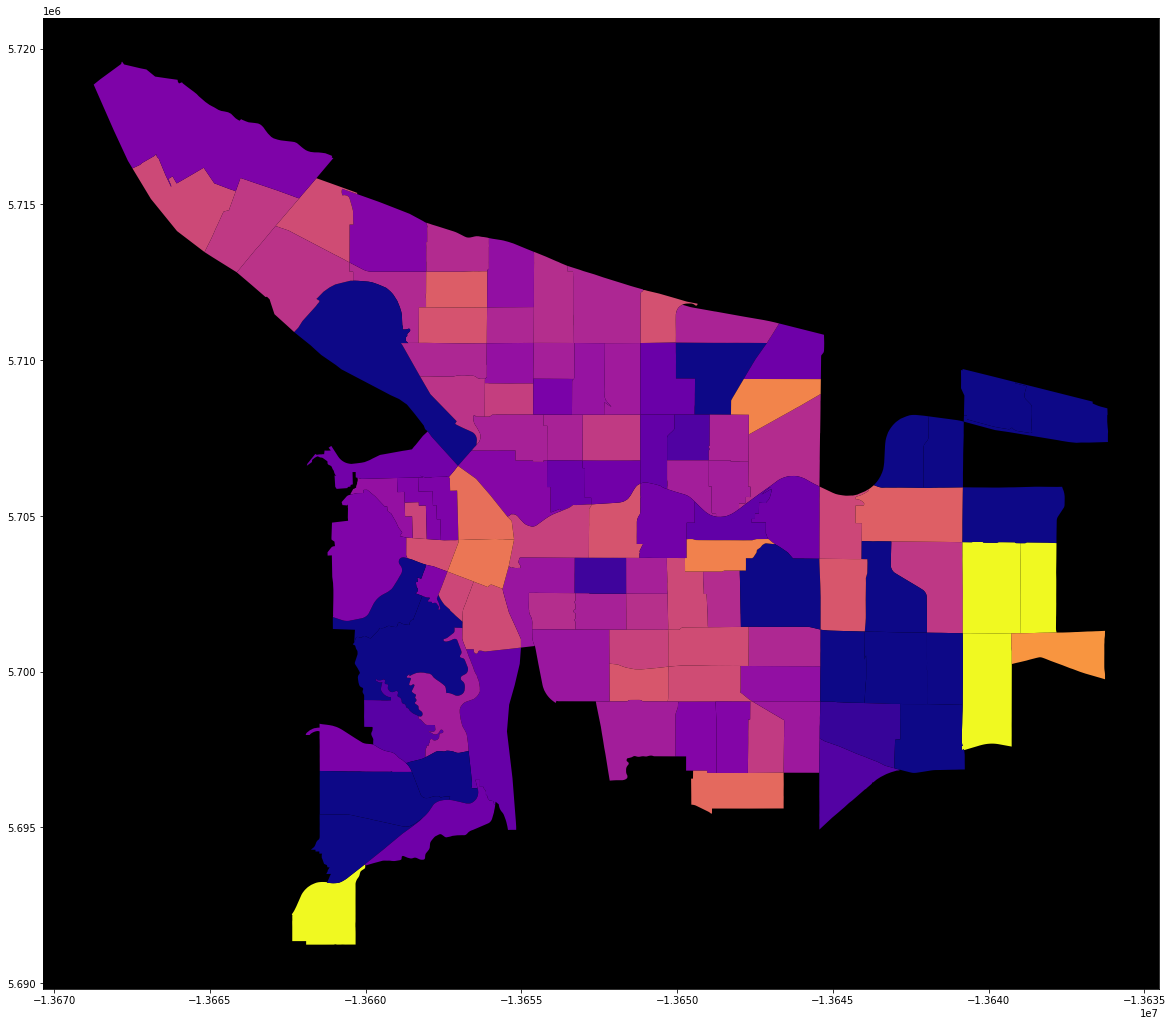

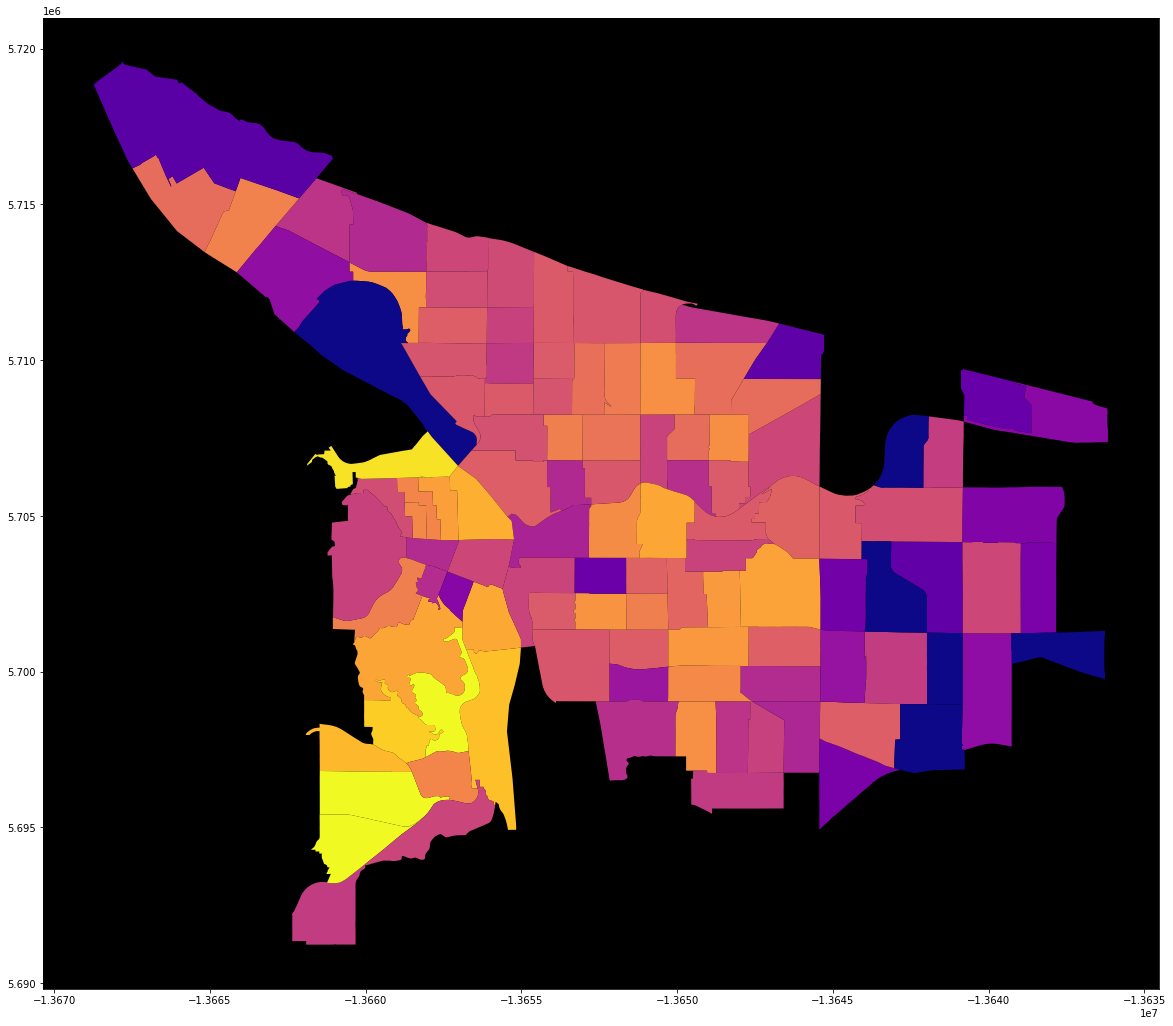

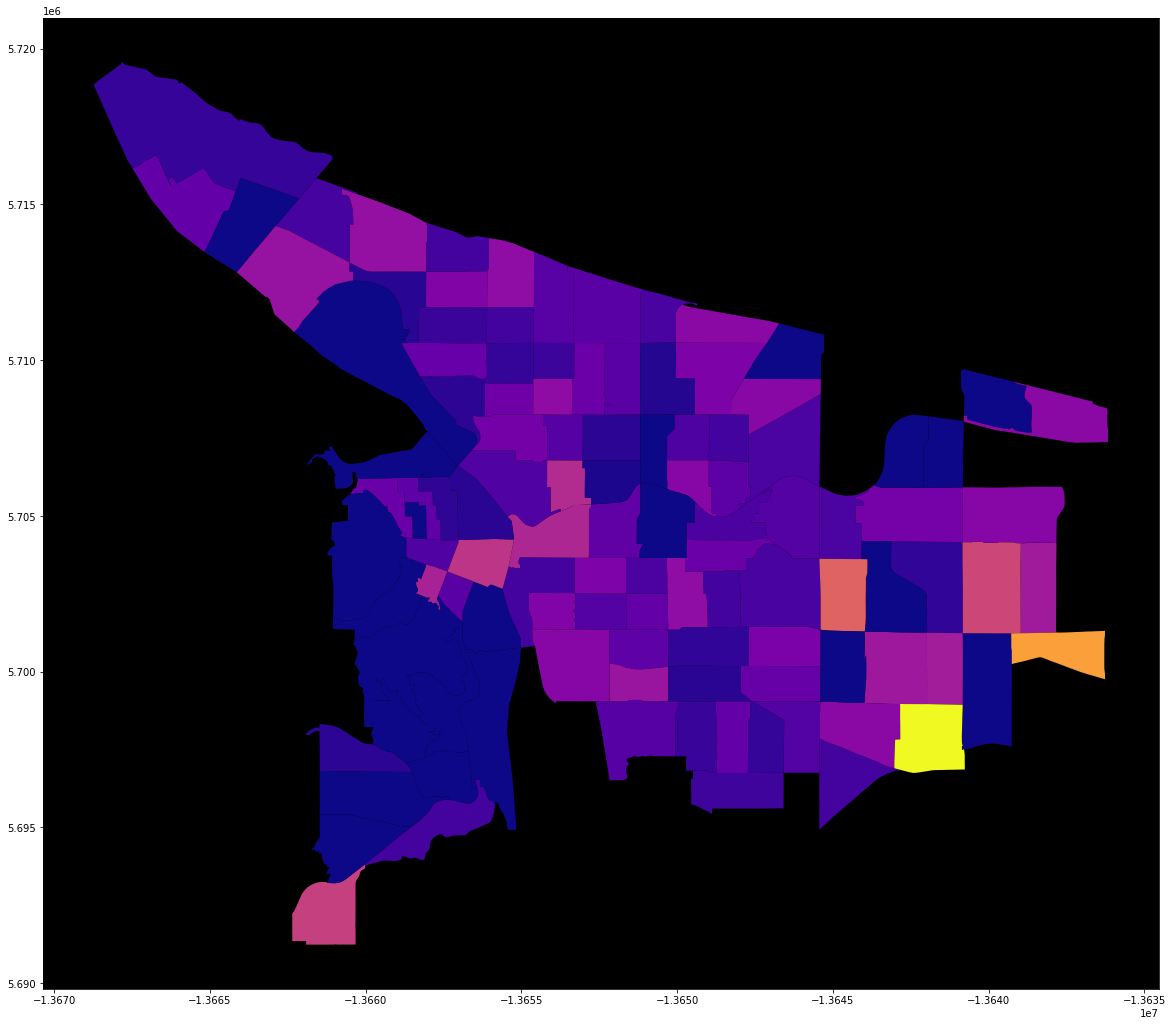

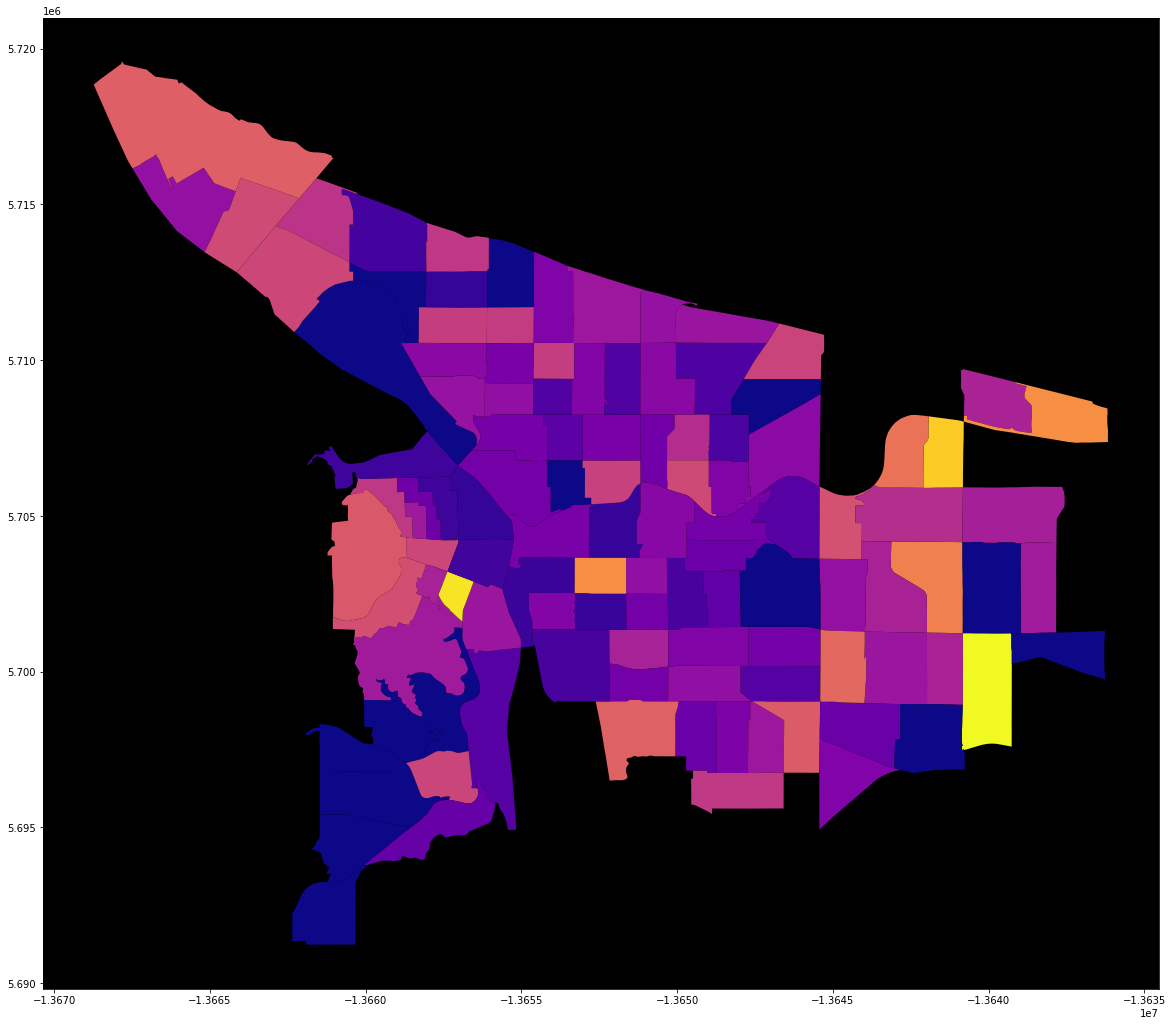

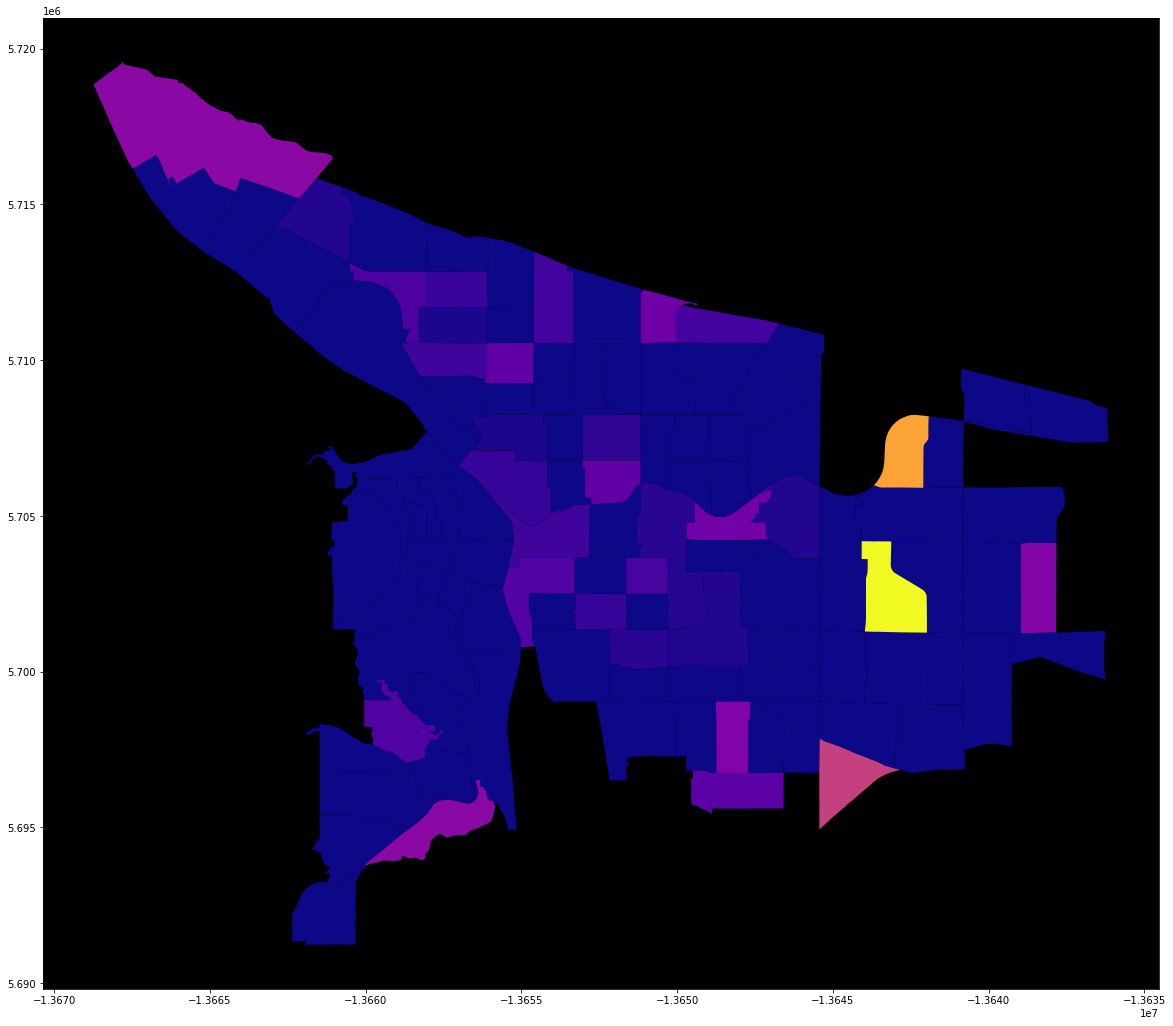

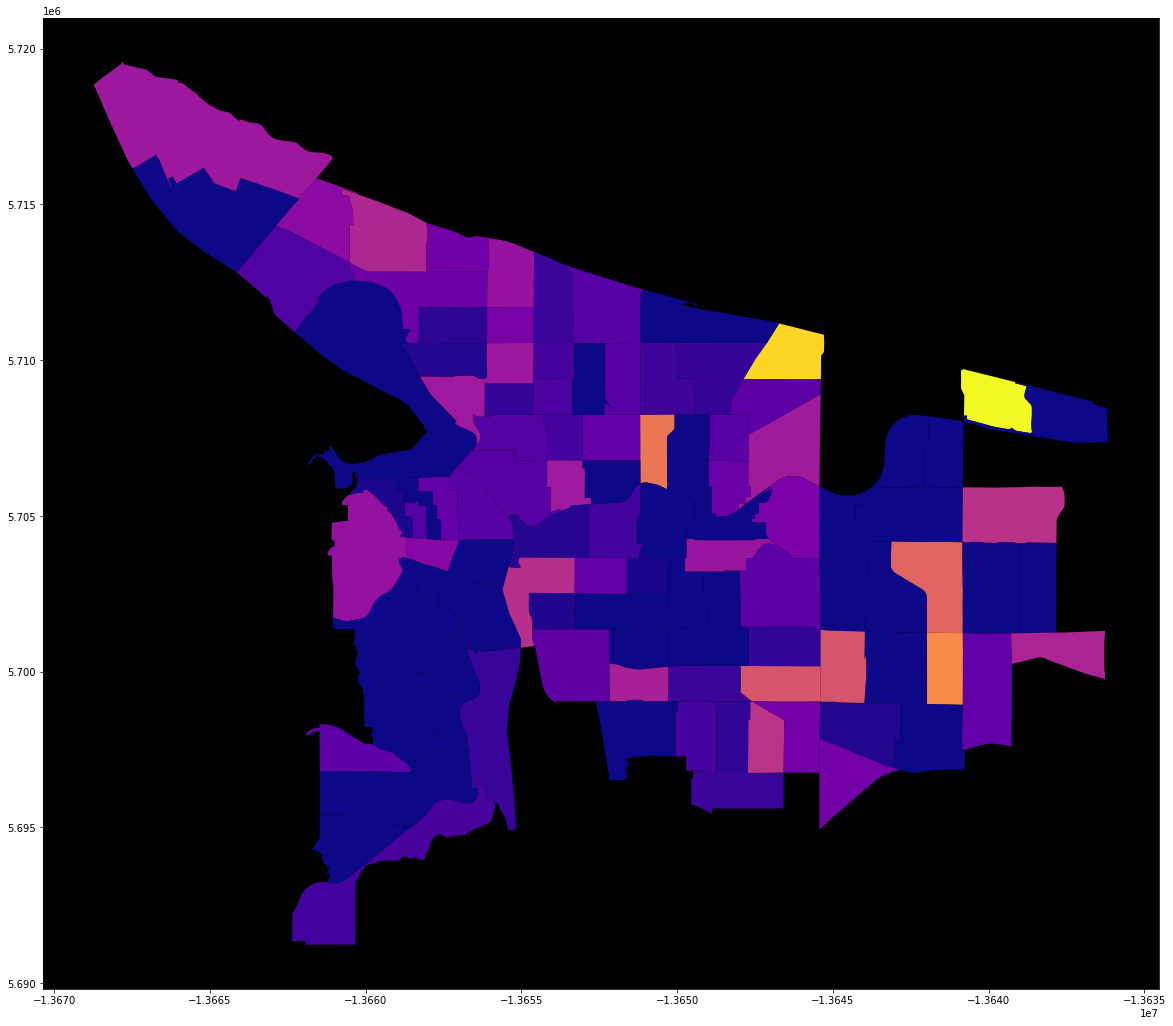

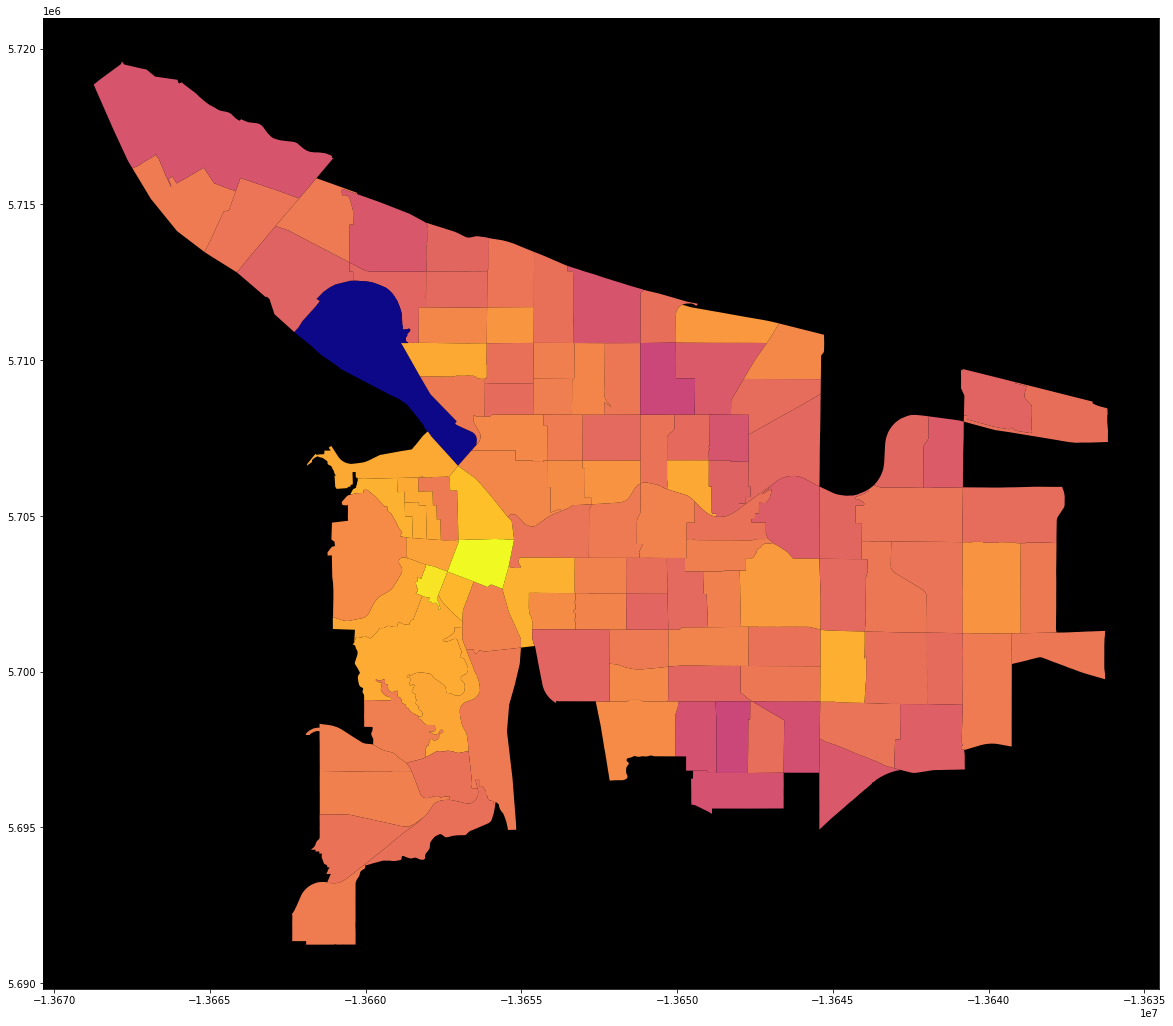

In [19]:
def plot(var):
    f, ax = plt.subplots(1,1,figsize=(20,20))
    db.dropna(subset=[var], axis=0).plot(var, ax=ax, cmap='plasma')
    ax.set_facecolor('k')
    
for variable in cluster_variables:
    plot(variable)

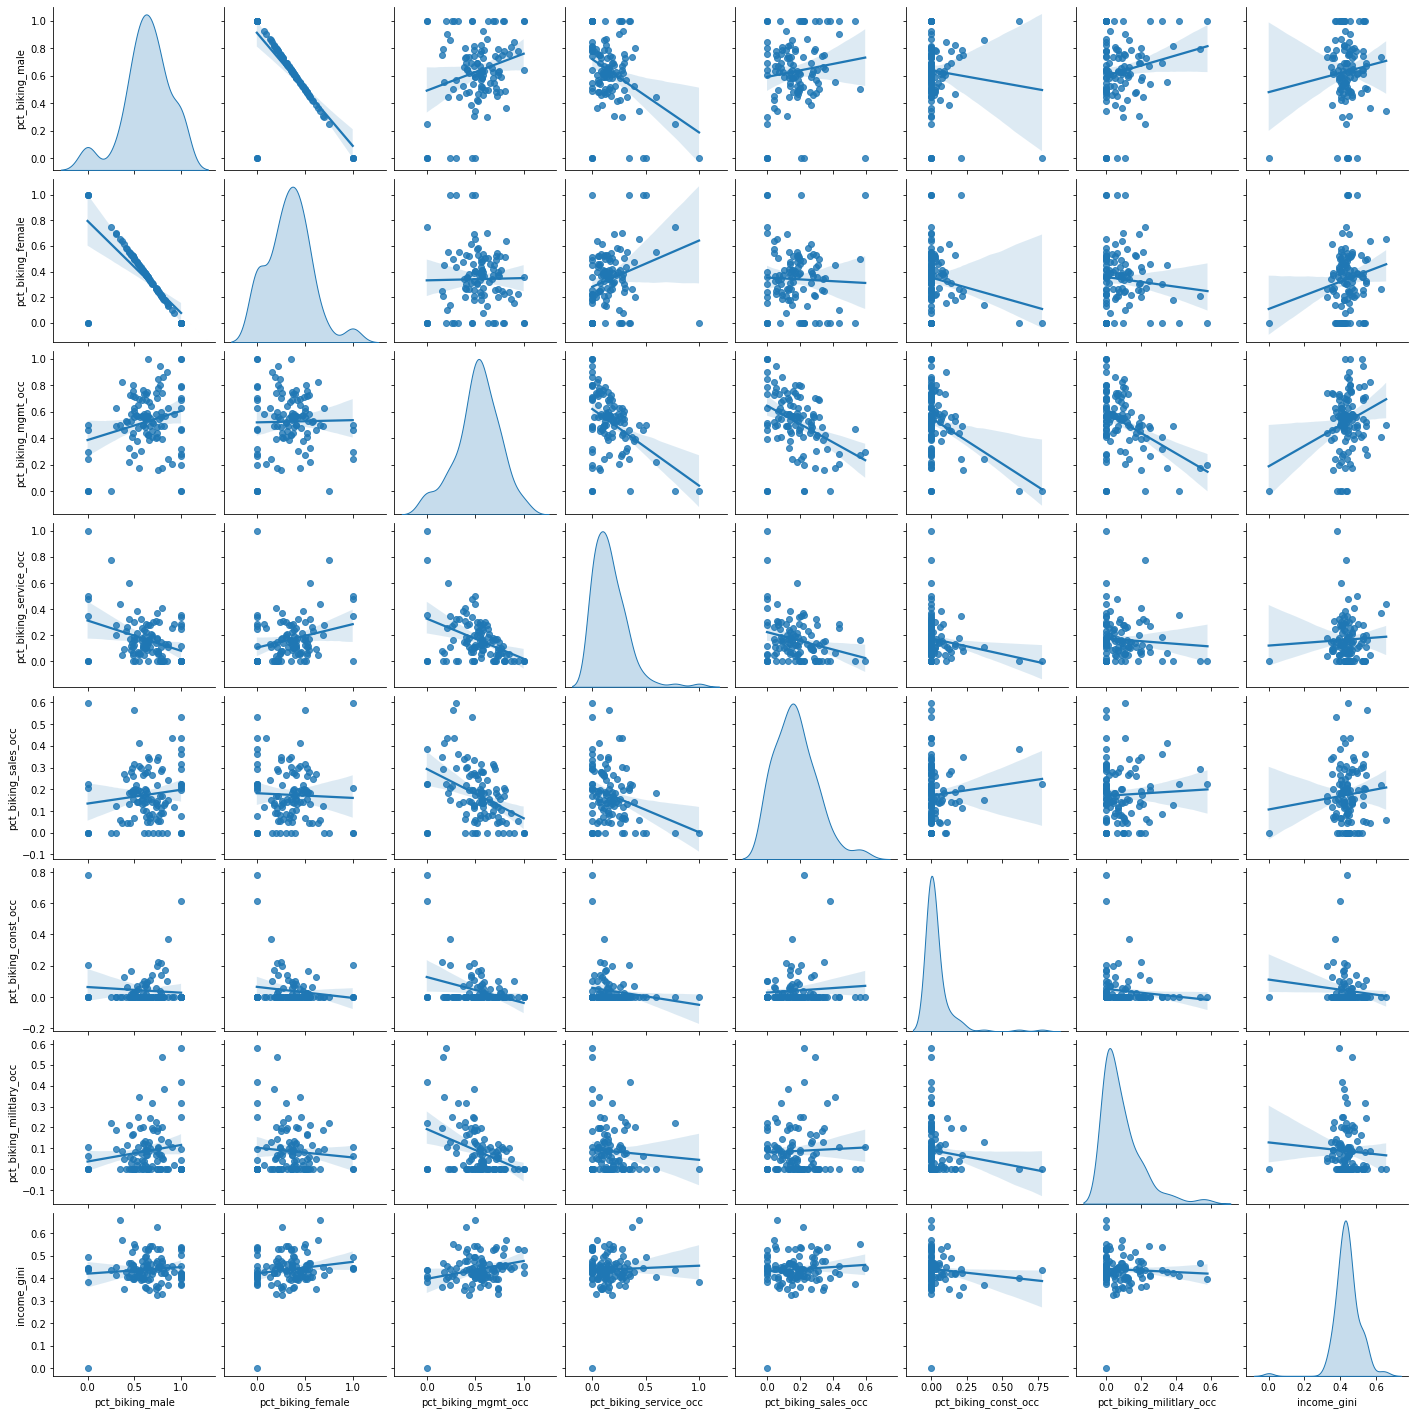

In [14]:
_=sns.pairplot(db[cluster_variables], kind='reg', diag_kind='kde')
plt.show()

In [44]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

In [56]:
kmeans = KMeans(n_clusters=4)

In [57]:
np.random.seed(1234)
k5cls = kmeans.fit(db[cluster_variables])

In [58]:
k5cls.labels_

array([3, 1, 3, 3, 3, 1, 1, 3, 0, 3, 3, 3, 1, 3, 0, 3, 3, 3, 2, 3, 3, 3,
       0, 2, 3, 1, 0, 3, 3, 3, 3, 0, 0, 1, 3, 0, 1, 0, 3, 2, 0, 1, 3, 3,
       3, 1, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3,
       3, 1, 1, 2, 1, 0, 2, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 0,
       3, 1, 3, 2, 3, 3, 0, 1, 1, 2, 3, 1, 0, 2, 0, 3, 1, 1, 1, 3, 3, 3,
       3, 0], dtype=int32)

/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


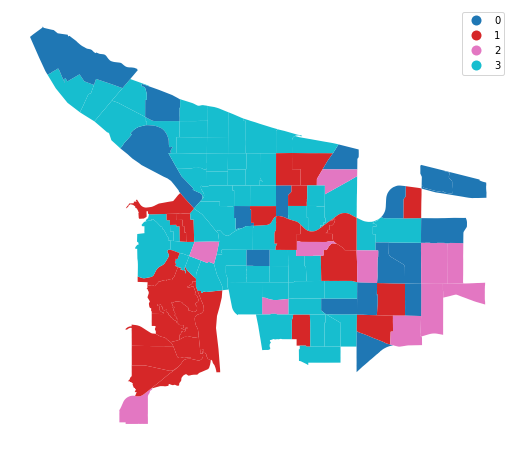

In [59]:
# Assign labels into a column
db['k4cls'] = k5cls.labels_
# Setup figure and ax
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including 
# a legend and with no boundary lines
db.plot(
    column='k4cls', categorical=True, legend=True, linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

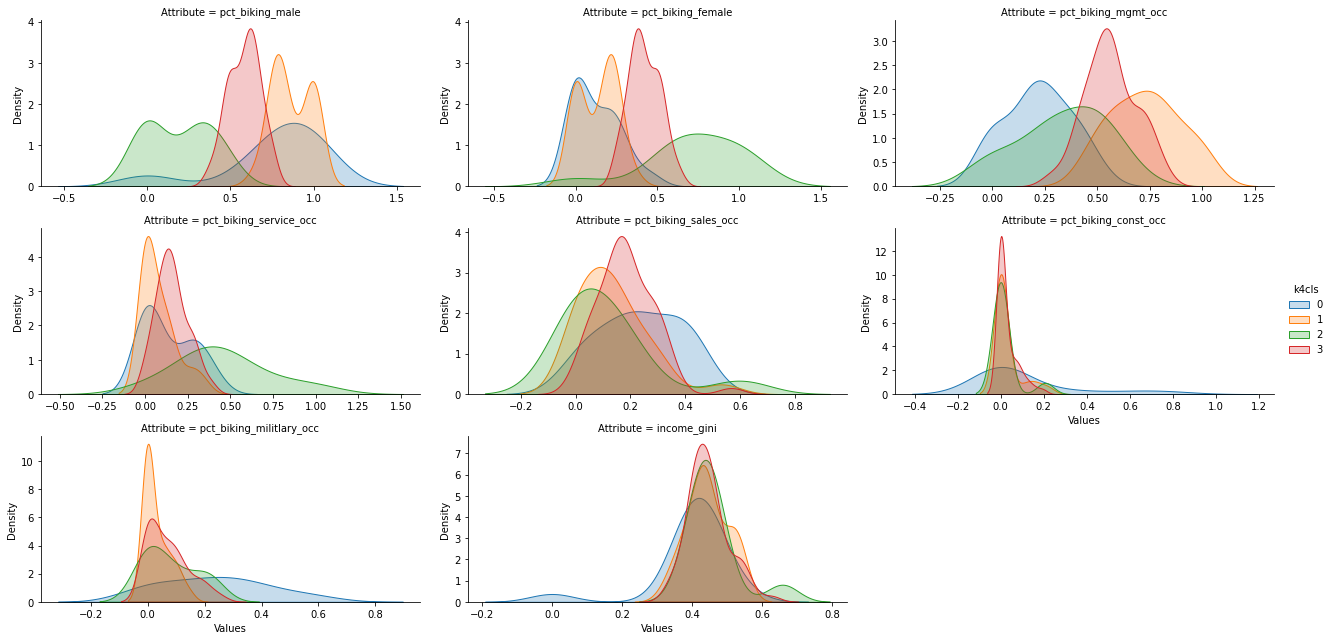

In [60]:
clust_config = 'k4cls'
tidy_db = db.set_index(clust_config)
tidy_db = tidy_db[cluster_variables]
tidy_db = tidy_db.stack()
tidy_db = tidy_db.reset_index()
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
facets = sns.FacetGrid(data=tidy_db, col='Attribute', hue=clust_config, \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
_ = facets.map(sns.kdeplot, 'Values', shade=True).add_legend()

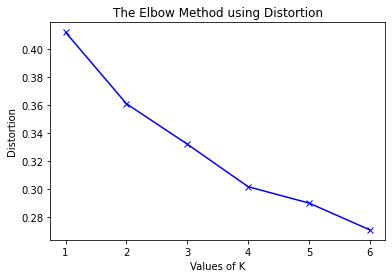

In [51]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 7)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(db[cluster_variables])
    kmeanModel.fit(db[cluster_variables])
 
    distortions.append(sum(np.min(cdist(db[cluster_variables], kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / (db[cluster_variables].shape[0]))
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(db[cluster_variables], kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / (db[cluster_variables].shape[0])
    mapping2[k] = kmeanModel.inertia_
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

/usr/local/lib/python3.9/site-packages/descartes/patch.py:63: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  concatenate([asarray(t.exterior)[:, :2]] +


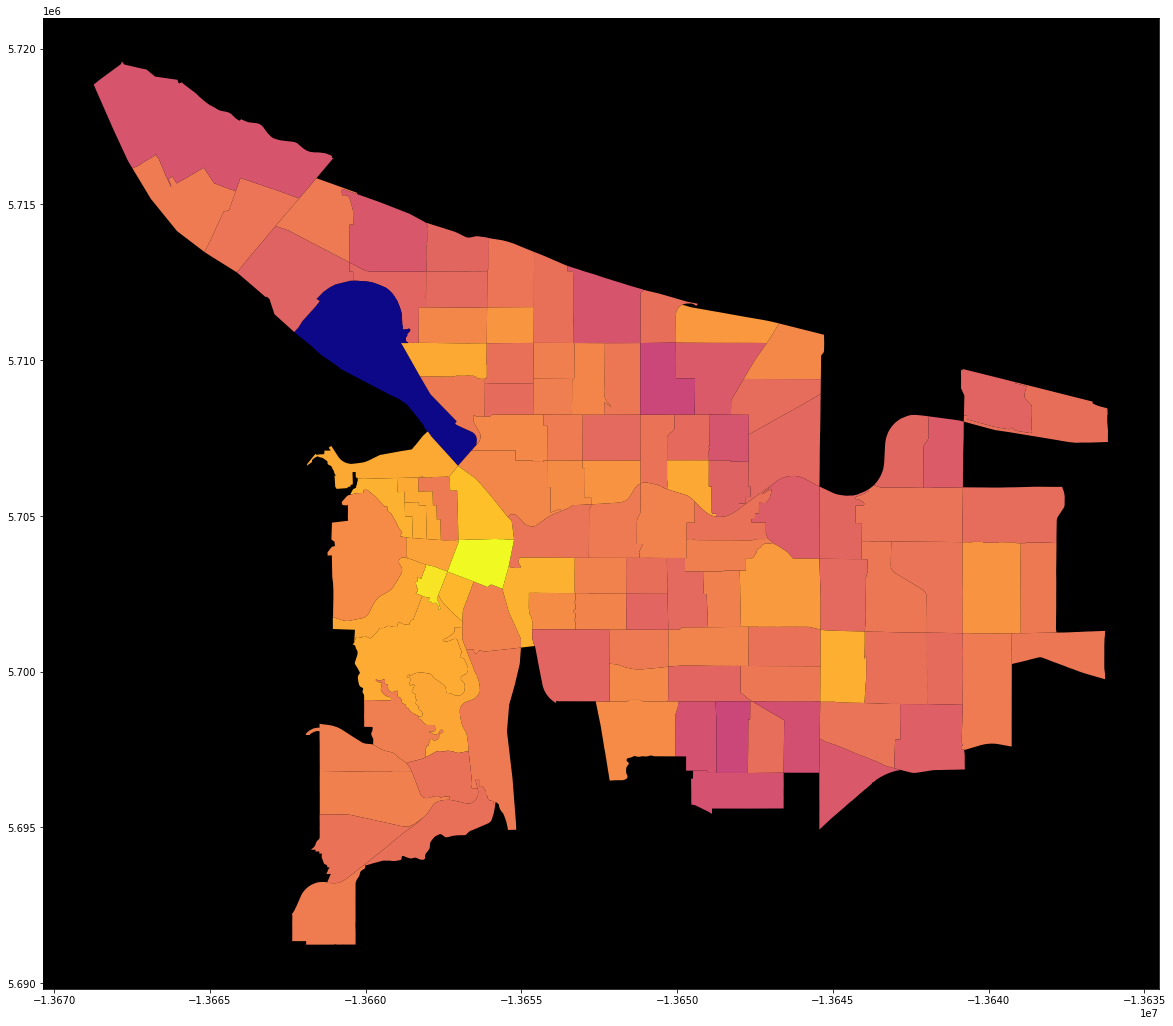

In [61]:
plot("income_gini")